In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sys

In [8]:
#Creating coordinates vector:
long=0.9
n=21
N=n**3
Mtotal=1
m=Mtotal/N

l1=np.linspace(0,long,n)
l2=np.linspace(0,long,n)
l3=np.linspace(0,long,n)

x,y,z=np.meshgrid(l1,l2,l3)

x.reshape(N,1)
y.reshape(N,1)
z.reshape(N,1)

Coordinates = np.concatenate((x,y,z),axis = 1)
Coordinates = Coordinates.reshape(N,3)



#Creating velocities vector:
Velocities = np.zeros_like(Coordinates)



#Creating IDs vector:
ID = np.linspace(1,N,N,dtype=int)
ID = ID.reshape(N,)


#Energy vector:
Energy=np.zeros_like(ID)+1e-3
Energy[int((N-1)/2)]=4096

#Create hdf5
filename = 'SPH-ics.hdf5'
#!rm SPH-ics.hdf5

#Create File
file = h5py.File(filename,'w')

#Create Group
header = file.create_group("Header")
PartType1 = file.create_group("PartType0")

coordsDSET = file.create_dataset("/PartType0/Coordinates", (N,3), dtype =  h5py.h5t.IEEE_F32LE)
IDsDSET = file.create_dataset("/PartType0/ParticleIDs", (N,), dtype =   h5py.h5t.STD_U32LE)
velsDSET = file.create_dataset("/PartType0/Velocities", (N,3), dtype =  h5py.h5t.IEEE_F32LE)
engyDSET = file.create_dataset("/PartType0/InternalEnergy", (N,), dtype =  h5py.h5t.IEEE_F32LE)

coordsDSET[...] = Coordinates
IDsDSET[...] = ID
velsDSET[...] = Velocities
engyDSET[...] = Energy

nparts = np.zeros(6)
nparts[0] = N
header.attrs['NumPart_ThisFile']    = nparts

massvec = np.zeros(6)
massvec[0] = Mtotal/N

header.attrs['MassTable']           = massvec
header.attrs['Time']                = 0
header.attrs['Redshift']            = 15
header.attrs['NumPart_Total']       = nparts
header.attrs['NumFilesPerSnapshot'] = 1
header.attrs['BoxSize']             = 1.0
header.attrs['Omega0']              = 1.0
header.attrs['OmegaLambdda']        = 0.
header.attrs['HubbleParam']         = 0.7
header.attrs['Flag_Entropy_ICs']    = 0
header.attrs['NumPart_Total_HighWord'] = np.zeros(3)

# Close the file before exiting
 
file.close()

In [10]:
np.max(z)

0.995

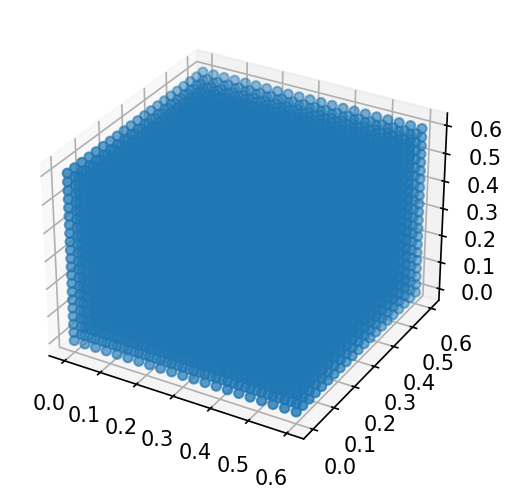

In [4]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
plot = ax.scatter3D(x,y,z)
plt.show()

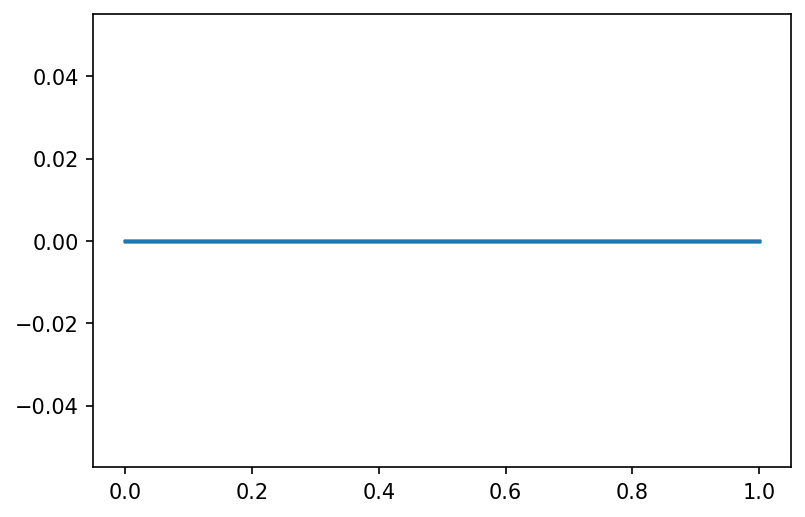